Code of Academic Integrity
* I affirm that
* This work is my own original work and is not a borrowed work,

*   This work is my own original work and is not a borrowed work, either from other students or from assignments for other courses.

*   I have not given or received any unauthorized help on this assignment.

*   This submission is free from Plagiarism, Fabrication of facts, Unauthorized assistance, collusion

*   This submission gives proper credit to sources and references, acknowledges the contributions and ideas of others relevant to this academic work.

*   This submission was prepared by me fully adhering to the rules that govern this assignment regarding resource material, electronic aids, copying, collaborating with others, or engaging in any other behavior that subverts the purpose of the assignment and the directions of the teacher.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **PAT 3**


### Question

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import NearestCentroid

In [ ]:
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [ ]:
#Import for decision tree
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from scipy.stats import norm
import statistics

## Custom Functions

In [ ]:
def Supreme(X, Y, df, t_size =0.25,MLP_acti='relu' ,r_state=5, isLinearRegression=False, isSVM=False, isLogisticRegression=False, isGradientDescent=False, isDecisionTree=False, isRandomForest=False, isMultiLayerPerception=False, isKmeans = False, isAgglo = False, isRegression=False, isClassification=False, isClustering =False, isPlot = False, n_x = 'x', n_y = 'y', n_model='poly', n_degree =2, grad_iter = 2000, k =3, g_title='Title', g_xlabel='x-label', g_ylabel='y-label', error = 1):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = t_size, random_state = r_state)
  if(isLinearRegression):
    model = LinearRegression()
  if(isSVM):
    model = svm.SVC(kernel = n_model, degree= n_degree)
  if(isLogisticRegression):
    model = LogisticRegression(C = 10, max_iter=100, solver='liblinear',tol=0.001,random_state=0)
  if(isDecisionTree):
    model = DecisionTreeClassifier(criterion = "entropy", random_state = 0, max_depth = 9)
  if(isRandomForest):
    model = RandomForestClassifier(n_estimators=100,bootstrap=False)
  if(isMultiLayerPerception):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    model = MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation=MLP_acti, solver='sgd', max_iter=1000)
  if(isGradientDescent):
    scaler = MinMaxScaler(feature_range=(0,1))
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model = SGDRegressor(max_iter= grad_iter, eta0=0.1,tol=0.001)
  if(isKmeans):
    model = KMeans(n_clusters = k, init = 'k-means++', max_iter= 300, n_init=10,random_state=0)
    model.fit(X)
    y_clusters = model.predict(X)
  if(isAgglo):
    model = hc = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage ='ward')
    model.fit(X)
    y_clusters = model.fit_predict(X)
  if(isClustering):
    print("Clustering: ",y_clusters)
    silhouette_avg = silhouette_score(X, y_clusters)
    print("Silhoutte Score: ", silhouette_avg)
    if(isPlot):
      x_array = np.array(X)
      plt.style.use("ggplot")
      plt.figure(figsize=(15,8))
      plt.title(g_title)
      plt.xlabel(g_xlabel)
      plt.ylabel(g_ylabel)
      for i in range(0, k):
        sns.scatterplot( x = x_array[y_clusters == i,0], y = x_array[y_clusters == i,1], label = "Cluster"+str(i+1) , s = 70)
      if(isKmeans):
        sns.scatterplot(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker='x',color='black',label='Centroid',s=70)
      if(isAgglo):
        clf = NearestCentroid()
        clf.fit(X, y_clusters)
        print(clf.centroids_)
        sns.scatterplot(clf.centroids_[:,0],clf.centroids_[:,1],marker='x',color='black',label='Centroid',s=70)
      plt.show()
    return(model, y_clusters)
  model.fit(X_train, Y_train)
  Y_Pred = model.predict(X_test)
  Y_Pred_train = model.predict(X_train)
  if(isClassification):
    print("Model Score: ",model.score(X_test, Y_test))
    sns.heatmap(confusion_matrix(Y_test, Y_Pred), annot = True, fmt='0.0f')
    print("Accuracy: ",accuracy_score(Y_test, Y_Pred))
    report = classification_report(Y_Pred, Y_test)
    print(report)
  if(isRegression):
    rmse_mlreg = np.sqrt(mean_squared_error(Y_Pred, Y_test)**2)
    print("Root mean squared error is: ", rmse_mlreg)
    r2_score_mlreg_train = r2_score(Y_Pred_train, Y_train)
    r2_score_mlreg_val = r2_score(Y_Pred, Y_test)
    print('r2_ score for train dataset : ', r2_score_mlreg_train)
    print('r2_ score for test dataset : ', r2_score_mlreg_val)
  if(isSVM):
    test_size = int(np.round(df.shape[0] *0.2,0)) + error
    if(isPlot):
      fig, ax = plt.subplots(figsize=(12, 7))# Removing to and right border
      ax.spines['top'].set_visible(False)
      ax.spines['left'].set_visible(False)
      ax.spines['right'].set_visible(False)# Create grid to evaluate model
      xx = np.linspace(-1, max(df[n_x]) + 1, len(X_train))
      yy = np.linspace(0, max(df[n_y]) + 1, len(Y_train))
      YY, XX = np.meshgrid(yy, xx)
      xy = np.vstack([XX.ravel(), YY.ravel()]).T
      train_size = len(df[:-test_size][n_x])# Assigning different colors to the classes
      colors = Y_train
      colors = np.where(colors == 1, '#8C7298', '#4786D1')# Plot the dataset
      ax.scatter(df[:-test_size][n_x], df[:-test_size][n_y], c=colors)#Get the separating hyperplane
      Z = model.decision_function(xy).reshape(XX.shape)
      # Draw the decision boundary and margins
      ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])# Highlight support vectors with a circle around them
      ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
      plt.show()
  if(isDecisionTree):
    if(isPlot):
      dot_data = StringIO()
      export_graphviz(model, out_file= dot_data, feature_names=list(X.columns), filled = True, rounded=True)
      graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
      display(Image(graph.create_png()))
  if(isLinearRegression):
    print("Intercept: ", model.intercept_)
    print("Slope: ", model.coef_)
  return model

In [ ]:
def ElbowMethod(D, c_num):
  wcss = []
  for i in range(1, c_num):
    kmeans = KMeans(n_clusters=i, init= 'k-means++', max_iter = 300, n_init= 10, random_state = 0)
    kmeans.fit(D)
    wcss.append(kmeans.inertia_)
  print("Value of wcss: ", wcss)
  # Plot visualization b/w WCSS and Number of CLusters(K)
  plt.plot(range(1,c_num), wcss)
  # to view the points clearly we add scatter plot in addition to line
  plt.scatter(range(1,c_num), wcss, c = 'black', marker='o')
  plt.xlabel("K - Number of Clusters")
  plt.ylabel("WCSS")
  plt.show()
  return wcss

In [ ]:
def heatplot(df):
  plt.figure(figsize=(12,8))
  sns.heatmap(df.corr(), annot = True, cmap ='RdPu')
  plt.show()

In [ ]:
def generate_random_dataset(size):
  """ Generate a random dataset and that follows a quadratic distribution
  """
  x = []
  y = []
  target = []
  for i in range(size):
  # class zero
    x.append(np.round(random.uniform(0, 2.5), 1))
    y.append(np.round(random.uniform(0, 20), 1))
    target.append(0) # class one
    x.append(np.round(random.uniform(1, 5), 2))
    y.append(np.round(random.uniform(20, 25), 2))
    target.append(1)
    x.append(np.round(random.uniform(3, 5), 2))
    y.append(np.round(random.uniform(5, 25), 2))
    target.append(1)
  df_x = pd.DataFrame(data=x)
  df_y = pd.DataFrame(data=y)
  df_target = pd.DataFrame(data=target)
  data_frame = pd.concat([df_x, df_y], ignore_index=True, axis=1)
  data_frame = pd.concat([data_frame, df_target], ignore_index=True, axis=1)
  data_frame.columns = ['x', 'y', 'target']
  return data_frame

In [ ]:
def meanchange(df, name):
  mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
  df[name] = mean_imputer.fit_transform(df[name].values.reshape(-1,1))[:,0]
  return df
def modechange(df, name):
  mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  df[name] = mode_imputer.fit_transform(df[name].values.reshape(-1,1))[:,0]
  return df

In [ ]:
def remove_outlier(df, cname):
    Q1 = df[cname].quantile(0.25)
    Q3 = df[cname].quantile(0.75)
    iqr = Q3-Q1
    upper_limit = Q3 + 1.5 * iqr
    lower_limit = Q1 - 1.5 * iqr
    df[cname]=np.where(
        df[cname]>upper_limit,
        upper_limit,
        np.where(
            df[cname]<lower_limit,
            lower_limit,
            df[cname]
        )
    )
    print(df[cname].skew())
    return df

In [ ]:
def LEncoder(df, cname):
  le_encoder = LabelEncoder()
  le_encoder.fit(df[cname].drop_duplicates())
  df[cname] = le_encoder.transform(df[cname])
  return df

## Pulling the Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/CSE4020-PAT-3 Data.csv", na_values=[" ","?","??","???","-"])

In [ ]:
df.isna().sum()

A1     0
A2     0
A3     1
A4     1
A5     0
A6     0
A7     0
A8     2
A9     0
A10    0
A11    1
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [ ]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,206979,1795.101,712.408675,379.011721,1.879648,84.673526,214037,513.355479,0.607021,0.967024,0.807158,0.720591,0.003442,0.000572,0.519252,0.976011
1,65881,1027.604,409.531317,207.223982,1.976274,0.862532,67226,289.624402,0.631988,0.979993,0.784004,0.707209,0.006216,0.000959,50.014515,0.988424
2,73884,1092.590,433.076159,220.136215,1.967310,0.861175,75689,NaN,0.632937,0.976152,0.777760,0.708216,0.005862,0.000910,0.501570,0.986745
3,71678,1054.534,422.650982,218.714063,1.932436,0.855694,73261,302.098103,0.633086,0.978392,0.809981,0.714770,0.005897,0.000949,0.510896,0.987273
4,74967,1059.749,414.629376,232.186792,1.785758,0.828502,75687,308.951370,0.633285,0.990487,0.838830,0.745127,0.005531,0.001052,0.555214,0.991477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,186509,1672.052,655.698756,366.117510,1.790952,0.829597,189519,487.309588,0.844016,0.984118,0.838321,0.743191,0.003516,0.000662,0.552333,0.989202
1763,186439,1663.337,627.810919,382.694747,1.640500,0.792732,188370,487.218131,0.848623,0.989749,0.846810,0.776059,0.003367,0.000753,0.602267,0.988020
1764,77815,1075.607,432.770170,230.696366,1.875930,0.846072,78443,314.765206,0.850251,0.991994,0.845213,0.727326,0.005562,0.000960,0.529004,0.992374
1765,162012,1528.138,588.943911,353.589588,1.665614,0.799716,163383,454.180675,0.852269,0.991609,0.871830,0.771178,0.003635,0.000793,0.594716,0.990567


## 1. Data Preprocessing

### (a) Identify the attributes which follow normal distribution

In [ ]:
df.shape

(1767, 16)

In [ ]:
df.ndim

2

In [ ]:
df.head(15)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,206979,1795.101,712.408675,379.011721,1.879648,84.673526,214037,513.355479,0.607021,0.967024,0.807158,0.720591,0.003442,0.000572,0.519252,0.976011
1,65881,1027.604,409.531317,207.223982,1.976274,0.862532,67226,289.624402,0.631988,0.979993,0.784004,0.707209,0.006216,0.000959,50.014515,0.988424
2,73884,1092.590,433.076159,220.136215,1.967310,0.861175,75689,NaN,0.632937,0.976152,0.777760,0.708216,0.005862,0.000910,0.501570,0.986745
3,71678,1054.534,422.650982,218.714063,1.932436,0.855694,73261,302.098103,0.633086,0.978392,0.809981,0.714770,0.005897,0.000949,0.510896,0.987273
4,74967,1059.749,414.629376,232.186792,1.785758,0.828502,75687,308.951370,0.633285,0.990487,0.838830,0.745127,0.005531,0.001052,0.555214,0.991477
5,74604,1089.456,421.210569,229.647581,1.834161,0.838300,77074,308.202471,0.640862,0.967953,0.789864,0.731706,0.005646,0.000998,0.535394,0.981999
6,67109,1017.317,NaN,218.458078,1.819502,0.835427,68530,292.311191,0.643398,0.979265,0.814851,0.735402,0.005923,0.001069,0.540816,0.984016
7,78675,1097.153,435.265432,233.328997,1.865458,0.844179,80325,316.499796,0.645385,0.979458,0.821320,0.727142,0.005532,0.000954,0.528736,0.986334
8,188980,1696.319,650.001991,374.729889,1.734588,0.817093,192822,490.527073,0.645609,0.980075,0.825298,0.754655,0.003440,0.000688,0.569504,0.987854
9,73020,1068.139,421.557452,221.260172,1.905257,0.851186,73700,304.913023,0.646996,0.990773,0.804259,0.723301,0.005773,0.000975,0.523165,0.996763


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2150296450>,
      dtype=object)

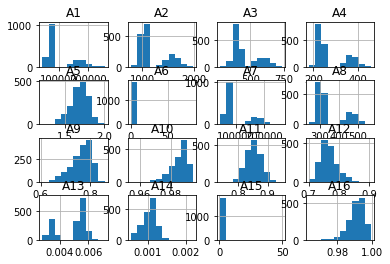

In [ ]:
df.hist()

Inference: A5, A10, A11, A12, A14 and A16 are normal distribution.

### (b) Do the imputation by replacing all the NaN values in an attribute with the mean of all the values of that attribute or mode of all the values of that attribute. After executing the imputation, confirm that the imputation gets reflected in the dataset with appropriate outputs.

In [ ]:
names = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15']
for x in range(0, len(names)):
  D = meanchange(df, names[x])
D

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,206979.0,1795.101,712.408675,379.011721,1.879648,84.673526,214037.0,513.355479,0.607021,0.967024,0.807158,0.720591,0.003442,0.000572,0.519252,0.976011
1,65881.0,1027.604,409.531317,207.223982,1.976274,0.862532,67226.0,289.624402,0.631988,0.979993,0.784004,0.707209,0.006216,0.000959,50.014515,0.988424
2,73884.0,1092.590,433.076159,220.136215,1.967310,0.861175,75689.0,351.130807,0.632937,0.976152,0.777760,0.708216,0.005862,0.000910,0.501570,0.986745
3,71678.0,1054.534,422.650982,218.714063,1.932436,0.855694,73261.0,302.098103,0.633086,0.978392,0.809981,0.714770,0.005897,0.000949,0.510896,0.987273
4,74967.0,1059.749,414.629376,232.186792,1.785758,0.828502,75687.0,308.951370,0.633285,0.990487,0.838830,0.745127,0.005531,0.001052,0.555214,0.991477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,186509.0,1672.052,655.698756,366.117510,1.790952,0.829597,189519.0,487.309588,0.844016,0.984118,0.838321,0.743191,0.003516,0.000662,0.552333,0.989202
1763,186439.0,1663.337,627.810919,382.694747,1.640500,0.792732,188370.0,487.218131,0.848623,0.989749,0.846810,0.776059,0.003367,0.000753,0.602267,0.988020
1764,77815.0,1075.607,432.770170,230.696366,1.875930,0.846072,78443.0,314.765206,0.850251,0.991994,0.845213,0.727326,0.005562,0.000960,0.529004,0.992374
1765,162012.0,1528.138,588.943911,353.589588,1.665614,0.799716,163383.0,454.180675,0.852269,0.991609,0.871830,0.771178,0.003635,0.000793,0.594716,0.990567


### (c) Identify the outliers in each of the attribute and replace the outliers using the ‘capping process’.

In [ ]:
D.isna().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [ ]:
for columns in names:
  D = remove_outlier(D, columns)

1.088292734643435
1.0013902698011823
1.0493420127900392
0.9581606329421872
-0.3659709476522011
-0.7426101057414974
1.0922056622301268
0.9805861666456038
-0.6627971666478214
-0.8973154770300109
-0.021513460249742
0.5790692957765631
-0.7688324119154332
-0.3012505140135855
0.6383354940285465


### (d)  Scale the features of the dataset with standardisation scaler and a min-max normalization scalar

In [ ]:
scaler = StandardScaler()
scaler.fit(D)
Dl = scaler.transform(D)

In [ ]:
Dl

array([[ 2.17258371,  2.27395416,  2.69041523, ..., -2.34662743,
        -1.6627154 , -3.30629514],
       [-0.73930501, -0.63187408, -0.48708029, ..., -0.51397426,
         2.4617052 , -0.56857059],
       [-0.5741443 , -0.38582992, -0.24007064, ..., -0.79037988,
        -2.07668373, -0.93891318],
       ...,
       [-0.49301888, -0.45012943, -0.24328078, ..., -0.50913709,
        -1.43439365,  0.30266256],
       [ 1.24458402,  1.26320281,  1.39514266, ..., -1.44020267,
         0.10410355, -0.09584956],
       [ 1.31380169,  1.40943754,  1.42790933, ..., -1.41970693,
         0.24280898, -0.81659868]])

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
Dl = scaler.fit_transform(D)

In [ ]:
Dl

array([[0.77219385, 0.84085898, 0.94299211, ..., 0.        , 0.13523864,
        0.34367715],
       [0.09744539, 0.19892439, 0.29023468, ..., 0.38282925, 1.        ,
        0.69247153],
       [0.13571675, 0.25327869, 0.34097822, ..., 0.32508992, 0.04844249,
        0.64528876],
       ...,
       [0.15451528, 0.23907411, 0.34031876, ..., 0.3838397 , 0.18311053,
        0.80346926],
       [0.55715597, 0.61757109, 0.67690242, ..., 0.1893462 , 0.50568504,
        0.75269761],
       [0.57319523, 0.64987621, 0.68363372, ..., 0.19362762, 0.53476721,
        0.660872  ]])

## 2. Training the models

### (a) With 75% of the dataset, Train a clustering model and concduct the following experiments

#### (i) Experiment 1 (E1): Train the K-means clustering model with the data set.

Value of wcss:  [8404516845964.626, 670984061457.0364, 309062382358.683, 203126291450.3485, 139459237865.67517, 100958436937.71481, 78798167029.09567, 61492418372.50102, 46639657062.29703, 40414882595.47864, 34622499249.92219, 29428092554.615944, 25696543578.73893, 21977067733.532402, 19221698671.674816]


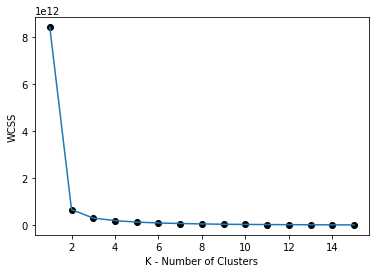

In [ ]:
wcss = ElbowMethod(D, 16)

Takin the value of k as 2.

In [ ]:
k = 2

Clustering:  [1 0 0 ... 0 1 1]
Silhoutte Score:  0.8720913266822289


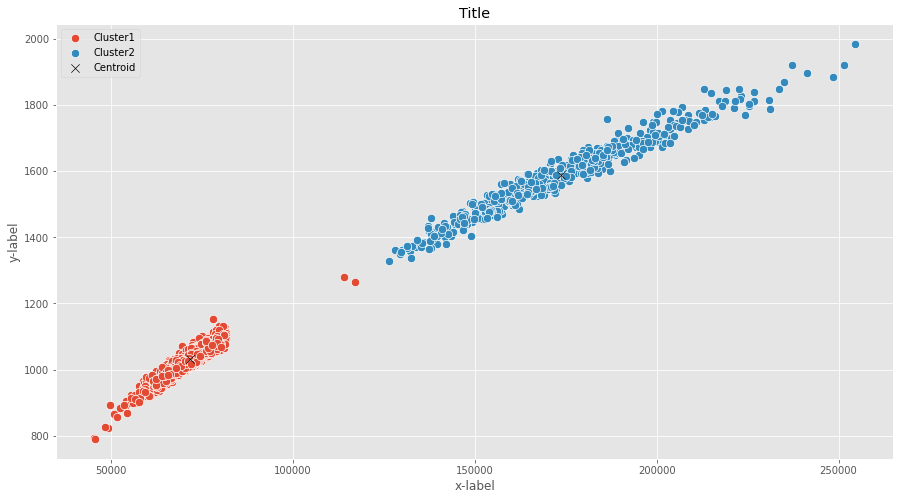

In [ ]:
kmeans, y_clusters = Supreme(D, D, D, k = k,t_size=0.25, isClustering= True, isKmeans=True, isPlot=True)

In [ ]:
kmeans.cluster_centers_

array([[7.16791812e+04, 1.03089636e+03, 3.98502387e+02, 2.30947011e+02,
        1.72766133e+00, 8.13430021e-01, 7.27758685e+04, 3.01866660e+02,
        7.59707771e-01, 9.85068656e-01, 8.46419048e-01, 7.58038308e-01,
        5.57966643e-03, 1.13808384e-03, 5.75196445e-01, 9.90656409e-01],
       [1.73708006e+05, 1.58682284e+03, 5.93746342e+02, 3.74494358e+02,
        1.58819411e+00, 7.74815052e-01, 1.76040635e+05, 4.69270023e+02,
        7.76778814e-01, 9.86993270e-01, 8.64197076e-01, 7.91223648e-01,
        3.44074409e-03, 8.43314090e-04, 6.26415131e-01, 9.91829684e-01]])

In [ ]:
(unique, counts) = np.unique(y_clusters, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[   0 1247]
 [   1  520]]


#### (ii)  Experiment 2 (E2) - Generating the labeled dataset from the output of E1

In [ ]:
clusters_label = []

In [ ]:
for x in range(0, len(y_clusters)):
  if(y_clusters[x]==0):
    clusters_label.append('class A')
  else:
    clusters_label.append('class B')
label = np.array(clusters_label)

In [ ]:
(unique, counts) = np.unique(label, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[['class A' '1247']
 ['class B' '520']]


In [ ]:
D1 = D.copy()

In [ ]:
D1['class'] = label.tolist()
D1

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,class
0,206979.0,1795.101,712.408675,379.011721,1.879648,0.883830,214037.0,513.355479,0.654577,0.971411,0.807158,0.720591,0.003442,0.000631,0.519252,0.976011,class B
1,65881.0,1027.604,409.531317,207.223982,1.976274,0.862532,67226.0,289.624402,0.654577,0.979993,0.784004,0.707209,0.006216,0.000959,0.695413,0.988424,class A
2,73884.0,1092.590,433.076159,220.136215,1.967310,0.861175,75689.0,351.130807,0.654577,0.976152,0.782469,0.708216,0.005862,0.000910,0.501570,0.986745,class A
3,71678.0,1054.534,422.650982,218.714063,1.932436,0.855694,73261.0,302.098103,0.654577,0.978392,0.809981,0.714770,0.005897,0.000949,0.510896,0.987273,class A
4,74967.0,1059.749,414.629376,232.186792,1.785758,0.828502,75687.0,308.951370,0.654577,0.990487,0.838830,0.745127,0.005531,0.001052,0.555214,0.991477,class A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,186509.0,1672.052,655.698756,366.117510,1.790952,0.829597,189519.0,487.309588,0.844016,0.984118,0.838321,0.743191,0.003516,0.000662,0.552333,0.989202,class B
1763,186439.0,1663.337,627.810919,382.694747,1.640500,0.792732,188370.0,487.218131,0.848623,0.989749,0.846810,0.776059,0.003367,0.000753,0.602267,0.988020,class B
1764,77815.0,1075.607,432.770170,230.696366,1.875930,0.846072,78443.0,314.765206,0.850251,0.991994,0.845213,0.727326,0.005562,0.000960,0.529004,0.992374,class A
1765,162012.0,1528.138,588.943911,353.589588,1.665614,0.799716,163383.0,454.180675,0.852269,0.991609,0.871830,0.771178,0.003635,0.000793,0.594716,0.990567,class B


#### (iii)  Experiment 3 (E3): Train the SVM classifier without doing any standardization/normalization procedure with the new data set D1 

In [ ]:
D1

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,class
0,206979.0,1795.101,712.408675,379.011721,1.879648,0.883830,214037.0,513.355479,0.654577,0.971411,0.807158,0.720591,0.003442,0.000631,0.519252,0.976011,class B
1,65881.0,1027.604,409.531317,207.223982,1.976274,0.862532,67226.0,289.624402,0.654577,0.979993,0.784004,0.707209,0.006216,0.000959,0.695413,0.988424,class A
2,73884.0,1092.590,433.076159,220.136215,1.967310,0.861175,75689.0,351.130807,0.654577,0.976152,0.782469,0.708216,0.005862,0.000910,0.501570,0.986745,class A
3,71678.0,1054.534,422.650982,218.714063,1.932436,0.855694,73261.0,302.098103,0.654577,0.978392,0.809981,0.714770,0.005897,0.000949,0.510896,0.987273,class A
4,74967.0,1059.749,414.629376,232.186792,1.785758,0.828502,75687.0,308.951370,0.654577,0.990487,0.838830,0.745127,0.005531,0.001052,0.555214,0.991477,class A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,186509.0,1672.052,655.698756,366.117510,1.790952,0.829597,189519.0,487.309588,0.844016,0.984118,0.838321,0.743191,0.003516,0.000662,0.552333,0.989202,class B
1763,186439.0,1663.337,627.810919,382.694747,1.640500,0.792732,188370.0,487.218131,0.848623,0.989749,0.846810,0.776059,0.003367,0.000753,0.602267,0.988020,class B
1764,77815.0,1075.607,432.770170,230.696366,1.875930,0.846072,78443.0,314.765206,0.850251,0.991994,0.845213,0.727326,0.005562,0.000960,0.529004,0.992374,class A
1765,162012.0,1528.138,588.943911,353.589588,1.665614,0.799716,163383.0,454.180675,0.852269,0.991609,0.871830,0.771178,0.003635,0.000793,0.594716,0.990567,class B


In [ ]:
pre_arr = [[206979.0,	1795.101,	712.408675,	379.011721	,1.879648	,0.883830,214037.0	,513.355479	,0.654577	,0.971411	,0.807158	,0.720591	,0.003442	,0.000631	,0.519252	,0.976011],[],[],[],[],[],[],[],[],[]]

In [ ]:
for x in range(1, len(pre_arr)):
  pre_arr[x] = np.random.uniform(0,10000, size=(16))

In [ ]:
pre_arr

[[206979.0,
  1795.101,
  712.408675,
  379.011721,
  1.879648,
  0.88383,
  214037.0,
  513.355479,
  0.654577,
  0.971411,
  0.807158,
  0.720591,
  0.003442,
  0.000631,
  0.519252,
  0.976011],
 array([  60.36494497, 5288.76148171,  677.88599236, 9705.03804147,
        5544.8854193 , 7063.17258227, 8337.21789479, 6685.11354071,
         132.21262872, 7634.66380475, 5129.02525928, 9619.06472398,
        3361.58641401, 3187.44123522,  770.28149818, 9915.1009605 ]),
 array([8100.07869132, 9152.74682355, 8236.67527011, 8742.19855355,
        6306.96615663, 5882.33290631, 5191.98050637, 1691.22207217,
        9634.12909361, 6965.77498198, 7693.94256399, 3120.64549484,
        5979.48648296, 9937.16043051,  588.52897538, 7594.08128962]),
 array([1299.7517699 , 6705.46549548, 9105.25119528,  340.23009908,
        6224.34983751, 4188.13818904, 3544.48063675, 5706.36621292,
        2788.6601141 , 3250.76488826, 9024.05020684, 5631.08699507,
         691.91542368,  623.58545873, 1120.1772550

In [ ]:
X = D1.drop(['class'], axis =1)
Y = D1['class']

Model Score:  0.997737556561086
Accuracy:  0.997737556561086
              precision    recall  f1-score   support

     class A       1.00      1.00      1.00       307
     class B       1.00      0.99      1.00       135

    accuracy                           1.00       442
   macro avg       1.00      1.00      1.00       442
weighted avg       1.00      1.00      1.00       442



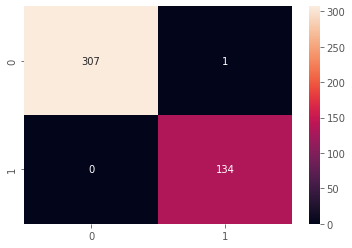

In [ ]:
svm_model = Supreme(X, Y, D1, isSVM= True, isClassification=True)

In [ ]:
svm_model.support_vectors_

array([[8.16660000e+04, 1.10502100e+03, 4.40445261e+02, 2.39509259e+02,
        1.83894879e+00, 8.39222019e-01, 8.30620000e+04, 3.22459890e+02,
        7.75187470e-01, 9.83193277e-01, 8.40446524e-01, 7.32122509e-01,
        5.39325131e-03, 9.55796550e-04, 5.36003369e-01, 9.85682746e-01],
       [1.14004000e+05, 1.27935600e+03, 4.51361256e+02, 3.23747996e+02,
        1.39417467e+00, 7.27065871e-01, 1.15298000e+05, 3.80991340e+02,
        7.48986604e-01, 9.88776909e-01, 8.75280258e-01, 8.36755021e-01,
        3.95917034e-03, 1.23978751e-03, 6.95413046e-01, 9.93342100e-01],
       [8.14940000e+04, 1.09733600e+03, 4.28705735e+02, 2.46834724e+02,
        1.73681291e+00, 8.17613643e-01, 8.37180000e+04, 3.22120138e+02,
        7.53736589e-01, 9.73434626e-01, 8.50464607e-01, 7.51378189e-01,
        5.26058034e-03, 1.03430293e-03, 5.64569182e-01, 9.80551044e-01],
       [8.15850000e+04, 1.10198100e+03, 4.08063257e+02, 2.58616079e+02,
        1.57787273e+00, 7.73525910e-01, 8.35000000e+04, 3.222

In [ ]:
svm_model.predict(pre_arr)

array(['class B', 'class A', 'class A', 'class A', 'class A', 'class A',
       'class A', 'class A', 'class A', 'class A'], dtype=object)

### (iV)Experiment 4 (E4): Train the SVM classifier with the data set D1, as follows.

Inference: A5, A10, A11, A12, A14 and A16 are normal distribution.

In [ ]:
D2 = D1.copy()

In [ ]:
X = D2.drop(['A5', 'A10', 'A11', 'A12', 'A14', 'A16', 'class'], axis =1)
normalizer = Normalizer().fit(X)
X = normalizer.transform(X)

In [ ]:
Y = D2[['A5', 'A10', 'A11', 'A12', 'A14', 'A16']]

In [ ]:
scaler = StandardScaler()
scaler.fit(Y)
Y = scaler.transform(Y)

In [ ]:
temp_X = pd.DataFrame(X, columns = ['A1','A2','A3', 'A4','A6','A7','A8','A9', 'A13','A15'])

In [ ]:
temp_Y = pd.DataFrame(Y, columns = ['A5', 'A10', 'A11', 'A12', 'A14', 'A16'])

In [ ]:
temp = pd.concat([temp_X, temp_Y], axis=1, join='inner')

In [ ]:
temp['class'] = label.tolist()

In [ ]:
D2 = temp.copy()

In [ ]:
D2

,A1,A2,A3,A4,A6,A7,A8,A9,A13,A15,A5,A10,A11,A12,A14,A16,class
0,0.695139,0.006029,0.002393,0.001273,0.000003,0.718843,0.001724,0.000002,1.155974e-08,0.000002,1.635380,-2.675296,-1.722521,-1.703097,-2.346627,-3.306295,class B
1,0.699873,0.010917,0.004351,0.002201,0.000009,0.714161,0.003077,0.000007,6.603676e-08,0.000007,2.454008,-1.061184,-2.618884,-2.185817,-0.513974,-0.568571,class A
2,0.698474,0.010329,0.004094,0.002081,0.000008,0.715538,0.003319,0.000006,5.541329e-08,0.000005,2.378065,-1.783498,-2.678313,-2.149492,-0.790380,-0.938913,class A
3,0.699295,0.010288,0.004123,0.002134,0.000008,0.714738,0.002947,0.000006,5.752681e-08,0.000005,2.082610,-1.362214,-1.613236,-1.913098,-0.568611,-0.822294,class A
4,0.703675,0.009947,0.003892,0.002179,0.000008,0.710433,0.002900,0.000006,5.191486e-08,0.000005,0.839926,0.912585,-0.496349,-0.818043,0.001994,0.104845,class A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,0.701406,0.006288,0.002466,0.001377,0.000003,0.712726,0.001833,0.000003,1.322131e-08,0.000002,0.883929,-0.285384,-0.516073,-0.887855,-2.173619,-0.396890,class B
1763,0.703437,0.006276,0.002369,0.001444,0.000003,0.710722,0.001838,0.000003,1.270517e-08,0.000002,-0.390718,0.773737,-0.187398,0.297761,-1.661343,-0.657725,class B
1764,0.704216,0.009734,0.003917,0.002088,0.000008,0.709899,0.002849,0.000008,5.033112e-08,0.000005,1.603877,1.196032,-0.249253,-1.460140,-0.509137,0.302663,class A
1765,0.704101,0.006641,0.002560,0.001537,0.000003,0.710060,0.001974,0.000004,1.579846e-08,0.000003,-0.177949,1.123525,0.781228,0.121706,-1.440203,-0.095850,class B


In [ ]:
D2 = LEncoder(D2, 'class')
D2

,A1,A2,A3,A4,A6,A7,A8,A9,A13,A15,A5,A10,A11,A12,A14,A16,class
0,0.695139,0.006029,0.002393,0.001273,0.000003,0.718843,0.001724,0.000002,1.155974e-08,0.000002,1.635380,-2.675296,-1.722521,-1.703097,-2.346627,-3.306295,1
1,0.699873,0.010917,0.004351,0.002201,0.000009,0.714161,0.003077,0.000007,6.603676e-08,0.000007,2.454008,-1.061184,-2.618884,-2.185817,-0.513974,-0.568571,0
2,0.698474,0.010329,0.004094,0.002081,0.000008,0.715538,0.003319,0.000006,5.541329e-08,0.000005,2.378065,-1.783498,-2.678313,-2.149492,-0.790380,-0.938913,0
3,0.699295,0.010288,0.004123,0.002134,0.000008,0.714738,0.002947,0.000006,5.752681e-08,0.000005,2.082610,-1.362214,-1.613236,-1.913098,-0.568611,-0.822294,0
4,0.703675,0.009947,0.003892,0.002179,0.000008,0.710433,0.002900,0.000006,5.191486e-08,0.000005,0.839926,0.912585,-0.496349,-0.818043,0.001994,0.104845,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,0.701406,0.006288,0.002466,0.001377,0.000003,0.712726,0.001833,0.000003,1.322131e-08,0.000002,0.883929,-0.285384,-0.516073,-0.887855,-2.173619,-0.396890,1
1763,0.703437,0.006276,0.002369,0.001444,0.000003,0.710722,0.001838,0.000003,1.270517e-08,0.000002,-0.390718,0.773737,-0.187398,0.297761,-1.661343,-0.657725,1
1764,0.704216,0.009734,0.003917,0.002088,0.000008,0.709899,0.002849,0.000008,5.033112e-08,0.000005,1.603877,1.196032,-0.249253,-1.460140,-0.509137,0.302663,0
1765,0.704101,0.006641,0.002560,0.001537,0.000003,0.710060,0.001974,0.000004,1.579846e-08,0.000003,-0.177949,1.123525,0.781228,0.121706,-1.440203,-0.095850,1


In [ ]:
# Resample uses bootstrapping method to regenerate samples by randomly selecting data for each class.
from sklearn.utils import resample
df_0 = D2[D2['class'] == 0]
df_1 = D2[D2['class'] == 1]

# Apply resample
df_1_upsample = resample(df_1, n_samples = 1247, replace = True, random_state= 123)

D2 = pd.concat([df_0,df_1_upsample])

In [ ]:
D2

,A1,A2,A3,A4,A6,A7,A8,A9,A13,A15,A5,A10,A11,A12,A14,A16,class
1,0.699873,0.010917,0.004351,0.002201,0.000009,0.714161,0.003077,0.000007,6.603676e-08,0.000007,2.454008,-1.061184,-2.618884,-2.185817,-0.513974,-0.568571,0
2,0.698474,0.010329,0.004094,0.002081,0.000008,0.715538,0.003319,0.000006,5.541329e-08,0.000005,2.378065,-1.783498,-2.678313,-2.149492,-0.790380,-0.938913,0
3,0.699295,0.010288,0.004123,0.002134,0.000008,0.714738,0.002947,0.000006,5.752681e-08,0.000005,2.082610,-1.362214,-1.613236,-1.913098,-0.568611,-0.822294,0
4,0.703675,0.009947,0.003892,0.002179,0.000008,0.710433,0.002900,0.000006,5.191486e-08,0.000005,0.839926,0.912585,-0.496349,-0.818043,0.001994,0.104845,0
5,0.695454,0.010156,0.003926,0.002141,0.000008,0.718479,0.002873,0.000006,5.263122e-08,0.000005,1.250003,-2.675296,-2.392014,-1.302145,-0.295747,-1.985532,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,0.702163,0.006946,0.002637,0.001581,0.000004,0.711973,0.002035,0.000004,1.739341e-08,0.000003,-0.158805,0.110138,-0.171364,0.143971,-1.279697,0.550844,1
432,0.700551,0.006907,0.002586,0.001622,0.000004,0.713559,0.002034,0.000003,1.712333e-08,0.000003,-0.784061,-0.726858,0.166518,0.680342,-1.000365,-0.997759,1
16,0.700825,0.006899,0.002579,0.001584,0.000004,0.713291,0.002006,0.000003,1.658854e-08,0.000003,-0.500649,-0.585396,-0.671342,0.363689,-1.228786,-1.361822,1
1198,0.701414,0.006456,0.002477,0.001441,0.000003,0.712717,0.001876,0.000003,1.392424e-08,0.000002,0.279545,-0.281126,-0.692318,-0.372371,-1.863326,-0.953845,1


In [ ]:
(unique, counts) = np.unique(D2['class'], return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[   0 1247]
 [   1 1247]]


In [ ]:
X = D2.drop(['class'], axis =1)
Y = D2['class']

Model Score:  0.9983974358974359
Accuracy:  0.9983974358974359
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       312
           1       1.00      1.00      1.00       312

    accuracy                           1.00       624
   macro avg       1.00      1.00      1.00       624
weighted avg       1.00      1.00      1.00       624



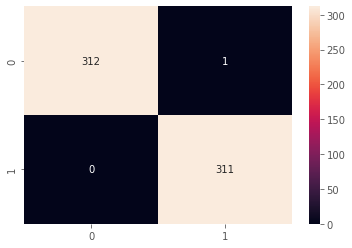

In [ ]:
stand_svm_model = Supreme(X, Y, D2, isSVM= True, isClassification= True)

In [ ]:
stand_svm_model.predict(pre_arr)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

#### (vi) Experiment 5 (E5): Train the Multi-layer Perceptron model with the data set D1

In [ ]:
X = D1.drop(['class'], axis =1)
Y = D1['class']

Model Score:  0.997737556561086
Accuracy:  0.997737556561086
              precision    recall  f1-score   support

     class A       1.00      1.00      1.00       307
     class B       1.00      0.99      1.00       135

    accuracy                           1.00       442
   macro avg       1.00      1.00      1.00       442
weighted avg       1.00      1.00      1.00       442



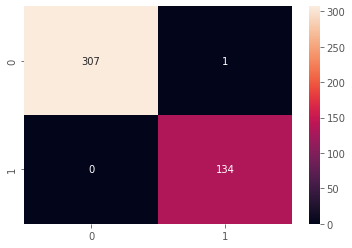

In [ ]:
mlp_linear = Supreme(X, Y, D1, MLP_acti='identity', isMultiLayerPerception=True, isClassification=True)

Model Score:  1.0
Accuracy:  1.0
              precision    recall  f1-score   support

     class A       1.00      1.00      1.00       308
     class B       1.00      1.00      1.00       134

    accuracy                           1.00       442
   macro avg       1.00      1.00      1.00       442
weighted avg       1.00      1.00      1.00       442



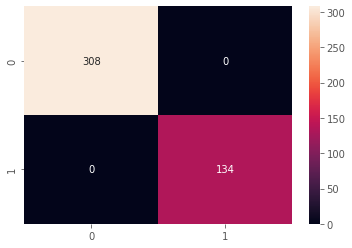

In [ ]:
mlp_relu = Supreme(X, Y, D1, MLP_acti='relu', isMultiLayerPerception=True, isClassification=True)

Model Score:  0.6968325791855203
Accuracy:  0.6968325791855203
              precision    recall  f1-score   support

     class A       1.00      0.70      0.82       442
     class B       0.00      0.00      0.00         0

    accuracy                           0.70       442
   macro avg       0.50      0.35      0.41       442
weighted avg       1.00      0.70      0.82       442



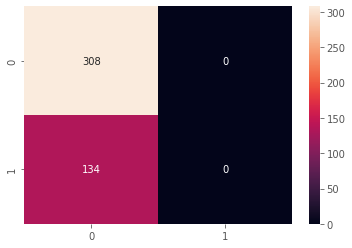

In [ ]:
mlp_sigmoid = Supreme(X, Y, D1, MLP_acti='logistic', isMultiLayerPerception=True, isClassification=True)

Model Score:  0.997737556561086
Accuracy:  0.997737556561086
              precision    recall  f1-score   support

     class A       1.00      1.00      1.00       307
     class B       1.00      0.99      1.00       135

    accuracy                           1.00       442
   macro avg       1.00      1.00      1.00       442
weighted avg       1.00      1.00      1.00       442



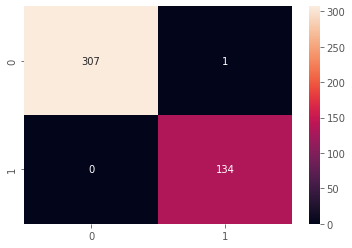

In [ ]:
mlp_tanh = Supreme(X, Y, D1, MLP_acti='tanh', isMultiLayerPerception=True, isClassification=True)

Relu has the highest accuracy which is 1.

In [ ]:
mlp_relu.predict(pre_arr)

array(['class B', 'class B', 'class B', 'class B', 'class B', 'class B',
       'class B', 'class B', 'class B', 'class B'], dtype='<U7')

## 3. Inference

1. 

In [ ]:
wcss

[8404516845964.626,
 670984061457.0364,
 309062382358.683,
 203126291450.3485,
 139459237865.67517,
 100958436937.71481,
 78798167029.09567,
 61492418372.50102,
 46639657062.29703,
 40414882595.47864,
 34622499249.92219,
 29428092554.615944,
 25696543578.73893,
 21977067733.532402,
 19221698671.674816]

In [ ]:
wcss_2 = kmeans.inertia_

In [ ]:
wcss_2

670984061457.0364

2. 

E3:Accuracy:  0.997737556561086

E4:Accuracy:  0.990506329113924

E5: Accuracy: 0.71 

Hence the order of accuracy: E3 > E4 > E5

3. 

In [ ]:
svm_model.support_vectors_

array([[8.16660000e+04, 1.10502100e+03, 4.40445261e+02, 2.39509259e+02,
        1.83894879e+00, 8.39222019e-01, 8.30620000e+04, 3.22459890e+02,
        7.75187470e-01, 9.83193277e-01, 8.40446524e-01, 7.32122509e-01,
        5.39325131e-03, 9.55796550e-04, 5.36003369e-01, 9.85682746e-01],
       [1.14004000e+05, 1.27935600e+03, 4.51361256e+02, 3.23747996e+02,
        1.39417467e+00, 7.27065871e-01, 1.15298000e+05, 3.80991340e+02,
        7.48986604e-01, 9.88776909e-01, 8.75280258e-01, 8.36755021e-01,
        3.95917034e-03, 1.23978751e-03, 6.95413046e-01, 9.93342100e-01],
       [8.14940000e+04, 1.09733600e+03, 4.28705735e+02, 2.46834724e+02,
        1.73681291e+00, 8.17613643e-01, 8.37180000e+04, 3.22120138e+02,
        7.53736589e-01, 9.73434626e-01, 8.50464607e-01, 7.51378189e-01,
        5.26058034e-03, 1.03430293e-03, 5.64569182e-01, 9.80551044e-01],
       [8.15850000e+04, 1.10198100e+03, 4.08063257e+02, 2.58616079e+02,
        1.57787273e+00, 7.73525910e-01, 8.35000000e+04, 3.222

In [ ]:
stand_svm_model.support_vectors_

array([[ 7.00193663e-01,  9.68366950e-03,  3.88177884e-03,
         2.02501784e-03,  7.41205597e-06,  7.13868438e-01,
         2.78305558e-03,  6.18119726e-06,  4.81646132e-08,
         4.46578333e-06,  1.95107664e+00, -9.01077960e-01,
        -1.41121002e+00, -1.83431519e+00, -8.24150718e-01,
        -1.24969341e+00],
       [ 6.99369076e-01,  9.65513125e-03,  3.81950415e-03,
         2.10883747e-03,  7.40736360e-06,  7.14676659e-01,
         2.81267104e-03,  6.68740750e-06,  4.85201238e-08,
         4.81776100e-06,  1.05538679e+00, -1.32670748e+00,
        -5.45118073e-01, -1.13294573e+00, -3.38351585e-01,
        -1.94728251e+00],
       [ 7.03943891e-01,  9.48361279e-03,  3.50758636e-03,
         2.31927822e-03,  6.77374273e-06,  7.10174122e-01,
         2.84479920e-03,  6.55185022e-06,  4.49909745e-08,
         5.93938619e-06, -1.47633527e+00,  1.05177258e+00,
         1.41058680e+00,  1.55969513e+00,  1.55359427e+00,
         8.40875994e-01],
       [ 6.99541294e-01,  9.41329477e

4. 

In [ ]:
svm_model.predict(svm_model.support_vectors_)

array(['class A', 'class B', 'class A', 'class A', 'class B', 'class B',
       'class B', 'class B'], dtype=object)

No, all the support vectors does belongs to one Class.

5. 

In [ ]:
stand_svm_model.predict(stand_svm_model.support_vectors_)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

No, all the support vectors does belongs to one Class.

6. 

In [ ]:
kmeans.cluster_centers_

array([[7.16791812e+04, 1.03089636e+03, 3.98502387e+02, 2.30947011e+02,
        1.72766133e+00, 8.13430021e-01, 7.27758685e+04, 3.01866660e+02,
        7.59707771e-01, 9.85068656e-01, 8.46419048e-01, 7.58038308e-01,
        5.57966643e-03, 1.13808384e-03, 5.75196445e-01, 9.90656409e-01],
       [1.73708006e+05, 1.58682284e+03, 5.93746342e+02, 3.74494358e+02,
        1.58819411e+00, 7.74815052e-01, 1.76040635e+05, 4.69270023e+02,
        7.76778814e-01, 9.86993270e-01, 8.64197076e-01, 7.91223648e-01,
        3.44074409e-03, 8.43314090e-04, 6.26415131e-01, 9.91829684e-01]])

No there are no cluster_centers in experiment E1 which are the support vectors in the experiment E3 or in the Experiment E4.

7.

* E3 - SVM without standardization - 0.997
* Experiment 4 (SVM with standaridzation and balancing)-  0.99705
* E5 - MLP with linear 0.9977
* Experiment 5 (MLP with sigmoid as activation function0.6968325791855203
* Experiment 5 (MLP with tanh as activation function- .9977
* Experiment 5 (MLP with ReLu as activation function - 1


In E5 is the best model with an accuracy score of 1 others accuracy can be inferered easily from above table.